# Assignment 2
### Learning Outcomes 
By completing this assignment, you will gain and demonstrate skills relating to 
- working within the python environment  
- visualizing of numerical data continued 
- tabulation and plotting of discrete data 
- Calculating joint, marginal, and conditional probabilities  
- Summarizing and plotting numerical data by group 

### Problem Description
We will use the same dataset on incomes from last week (income_dataset.csv). 

The data set has the following data columns:
- age: Age in years
- workclass: Classification of workplace:
    - Private: Employed in private company
    - Local-gov: Local government
    - State-gov: State government
    - Federal-gov: Federal government 
    - Self-emp-inc: Self employed in own company
    - Self-emp-not-inc: Self employed in other legal format
- education: Education level
- educational-num: Numerical level of education 
- marital-status
- occupation 
- race
- gender
- capital-gain: Annual gains from capital investments as reported in tax return 
- capital-loss: Annual loss from capital investments 
- hours-per-week: Self-reported number of hours per week worked 
- native-country: Country of birth 
- income: Annual salary in USD (without capital gains)
- month_of_birth: Birth month (1-12)

You are allowed to use numpy, pandas, matplotlib, and seaborn packages - please do not use other packages that are not supported in the course. 

To solve this homework, you are expected to read portions of the Python for Data Analysis textbook - or use the online documentation on Python. To help you not get lost, we will point you to the relevant book section for the various tasks. However, you may have to go back and read some basics if you realize that you are missing understanding on some foundational concept. 

### Overview of plotting (pg. 219-240)
Read pages 219 to 231 in the Python for Data Analysis book. While we do not assign a specific task, the knowledge gained here will help in completing the tasks in the rest of this homework. In addition, step through this https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb. It is suggested that you download the notebook and run it locally to fully benefit from the tutorial.  

### Submit via OWL
Use the jupyter notebook provided and fill in your answer in the code cells. Before submitting, please make sure you clear the output prior to submission (Cell Menu -> All Outputs -> Clear ). Submit your notebook file under the file name YourUserID_Assign1.ipynb 

Make sure that you develop your code with Python 3.7 as the interpreter. The TA will not endeavor to fix code that uses earlier versions of Python (e.g. 2.7). Make sure that your code includes all statements that it requires to work properly when calling Cell->Run All. 

### General Marking criteria: 
- Does the program behave according to specifications?
- Are you using appropriate data structures?
- Is the output according to specifications?
- Are all questions answered fully? Written responses must be answered in full English sentences.
- Comments for pieces of code that are longer than few line 
- All figures require axis labels 
- All Figures require an informative caption
- Use Python coding conventions and good programming techniques, for example:
    * meaningful variable names
    * conventions for naming variables and constants
    * Use of constants where appropriate
    * Readability: indention, white space, consistency.

## Task 1: Plotting histograms II (Subplots) (? / 15 points)
Preliminaries: Import the packages relevant to this Assigment

In case you notebook environment is not automatically setup to include the figures inline, you may have to run the following code: <br>
import matplotlib <br>
matplotlib.use('TkAgg') <br>
%matplotlib inline <br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Question1. Load the movieDataset and calculate the new column "total" as the income + capital-gain - capital-loss (? / 2 points)

In [2]:
df = pd.read_csv("income_dataset.csv")
df['total'] = df.apply(lambda x: x['income'] + x['capital-gain']- x['capital-loss'], axis=1)

### Question2. Generate a new figure with an array of 6 subplots (2 rows and 3 columns recommended, see pages 220-223). In the subplots, provide a histogram for the variables age, educational-num, income, month of birth, hours per week, and total. For each variable, choose an appropriate number of bins (? / 4 points)

Hint: For variables with discrete integer values (age, educational-num,month-of-birth, hours-per-week), it is natural to have a separate bin for each unique value. For this you need to set the number of bins to the range of the data. 
To see what happens when you do not do this, plot a histogram of age with either 50 or 100 bins. 


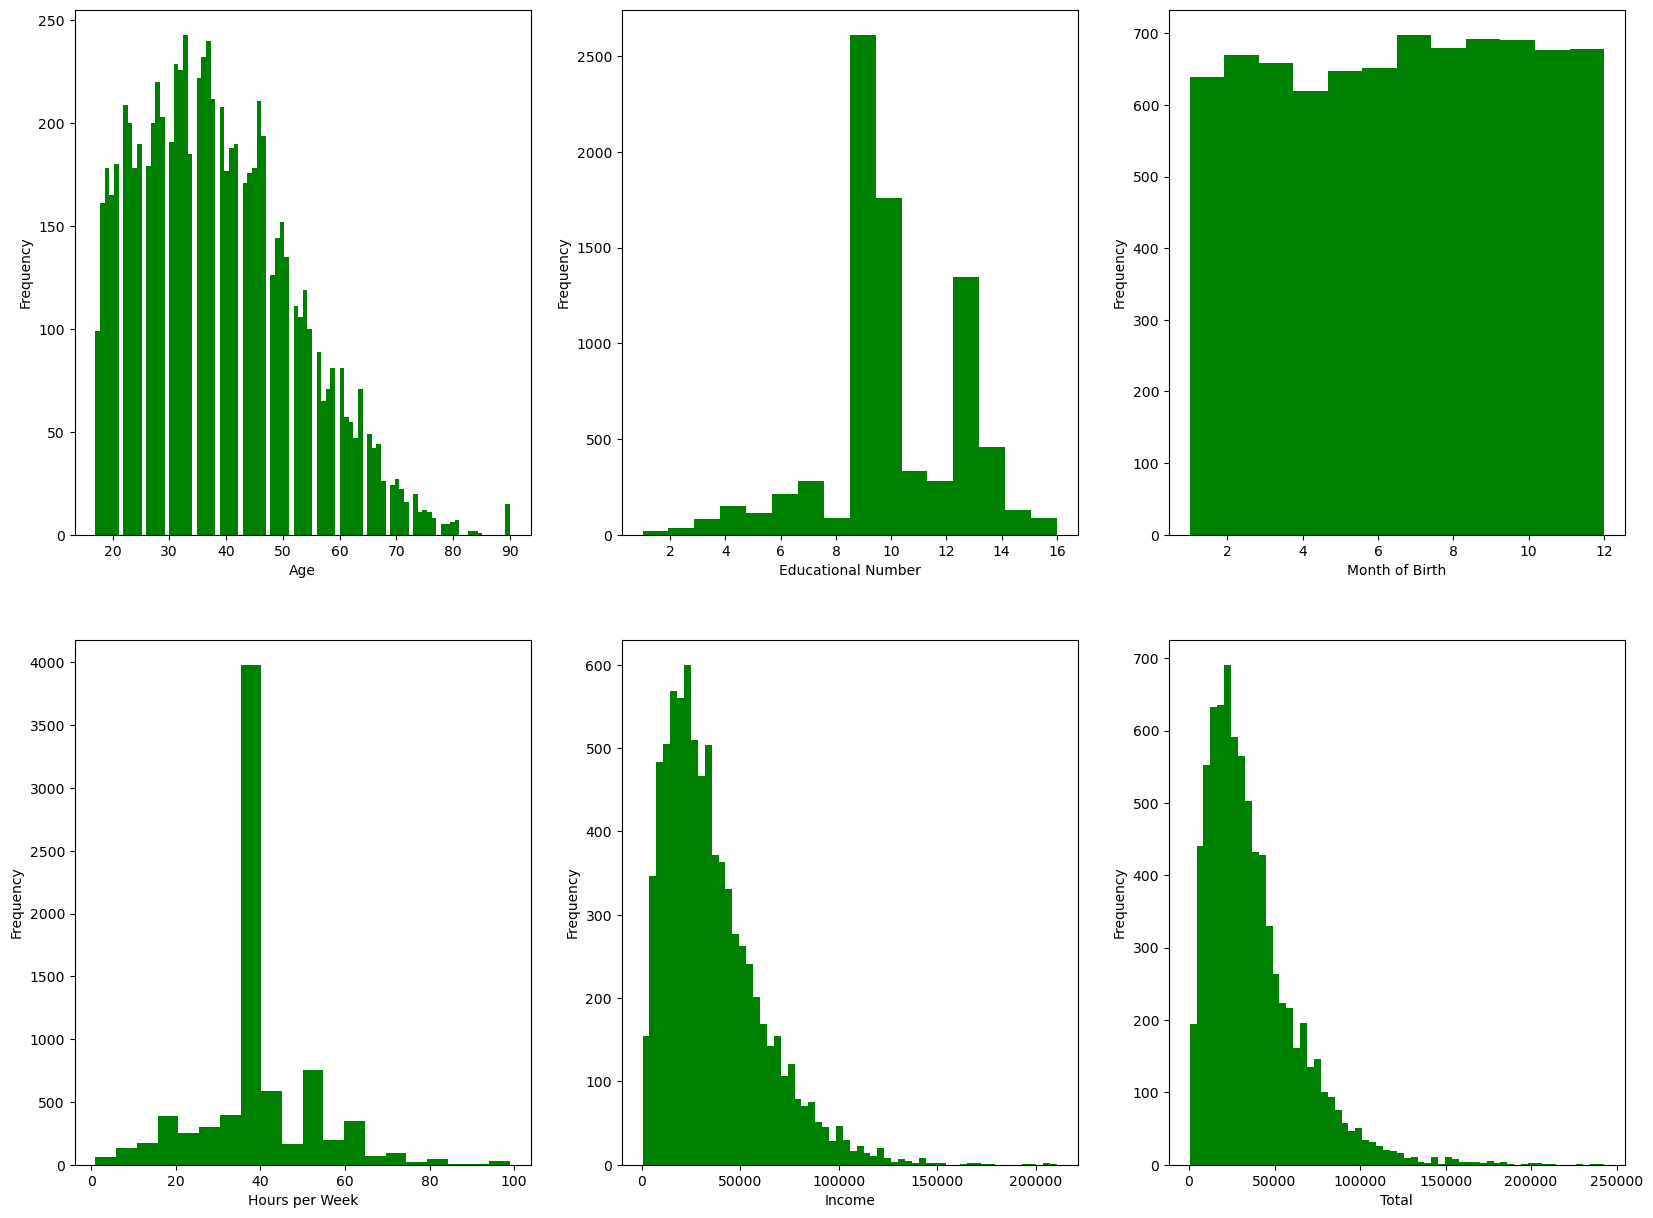

In [3]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

axes[0,0].hist(df['age'], bins = df['age'].max(), color = 'g')
axes[0,0].set_xlabel("Age")

axes[0,1].hist(df['educational-num'], bins = 16, color = 'g')
axes[0,1].set_xlabel("Educational Number")

axes[0,2].hist(df['month_of_birth'], bins = df['month_of_birth'].max(), color = 'g')
axes[0,2].set_xlabel("Month of Birth")

axes[1,0].hist(df['hours-per-week'], bins = 20, color = 'g')
axes[1,0].set_xlabel("Hours per Week")

axes[1,1].hist(df['income'], bins = 60, color = 'g')
axes[1,1].set_xlabel("Income")

axes[1,2].hist(df['total'], bins = 60, color = 'g')
axes[1,2].set_xlabel("Total")

# Sets y axis of every graph to be labeled with "Frequency"
for i in range(0,3):
    for j in range(0,2):
        axes[j,i].set_ylabel("Frequency")


Figure 1-6. Collection of histograms showing the frequency of various variables within the Income Dataset. These variables include age, educational number, month of birth, hours per week, income, and total.

### Question 3. Written response: Justify the number of bins chosen for each variable. ( ? / 3 points)

Age: I chose the max number of bins possible, as the hint noted that each unique value for descrete integers should have it's own bin.

Educational Number: I chose 16 bins, as there are 16 possible values. Each unique value should have it's own bin for this variable.

Month of Birth: I chose 12 bins, as there are 12 possible values. Each unique value should have it's own bin for this variable. Specifically for months, they are clearly unique entities in which grouping values in any form does not make sense.

Hour per week: I chose 20 bins as I believe it shows enough detail without expressing every unique value. Values are grouped in increments of 5. 

Income: I chose 60 bins as I believe it shows enough detail with a focus on the general trend of the data. 

Total: Once again, I chose 60 bins as I believe it shows enough detail with a focus on the general trend of the data. 60 bins also allows for you to see some of the differences between income and total as they are very similar overall.

### Question 4: Describe the shape of the distribution for each variable, including the number of modes and the shape (symmetric, skew, uniform?).  (? / 6 points)

Age: Unimodal with a right skew

Educational Number: Bimodal with a left skew

Month of Birth: Uniform and symmetric (generally)

Hours per week: Unimodal with a very slight right skew 

Income: Unimodal with a right skew

Total: unimodal with a right skew 

## Task 2: Tabulating and visualizing categorical data (pg. 24-30 and pg 250-256) (? / 20 points)

### Question1. Create a contingency table of gender (rows) by workclass (columns) without the marginal sums. You may normalize the table by rows or columns. Print to the screen. (? / 4 points)

In [4]:
table = pd.crosstab(df['gender'], df['workclass'], margins = False)
table

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
gender,,,,,,
Female,76,209,1903,33,108,131
Male,145,305,3684,233,508,213


### Question2. Plot the workclass counts by gender as a grouped bar chart (? / 3 points)

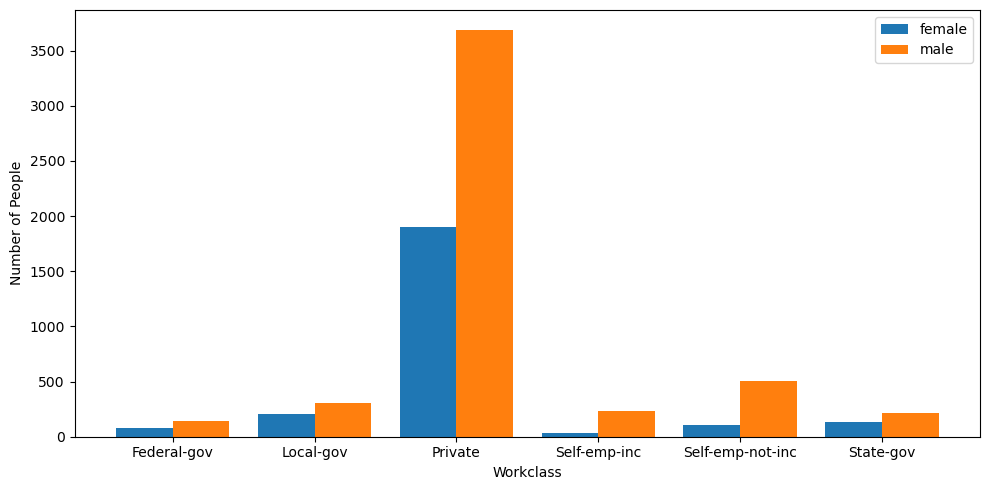

In [5]:
x = np.arange(len(table.columns))
width = 0.4

fig, axes = plt.subplots(figsize = (10,5))
axes.bar(x - width/2, table.iloc[0], width, label = "female")
axes.bar(x + width/2, table.iloc[1], width, label = "male")

axes.legend()
axes.set_xticks(x, table.columns)
axes.set_ylabel("Number of People")
axes.set_xlabel("Workclass")
fig.tight_layout()


Figure 7. Grouped bar chart showing the number of people in each workclass based on their gender.


### Question3. Make a Figure with 2 subplots. Plot the workclass counts by gender as a grouped bar chart (as in Question 2) in one subplot, and as a stacked barchart the other subplot. (? / 3 points)

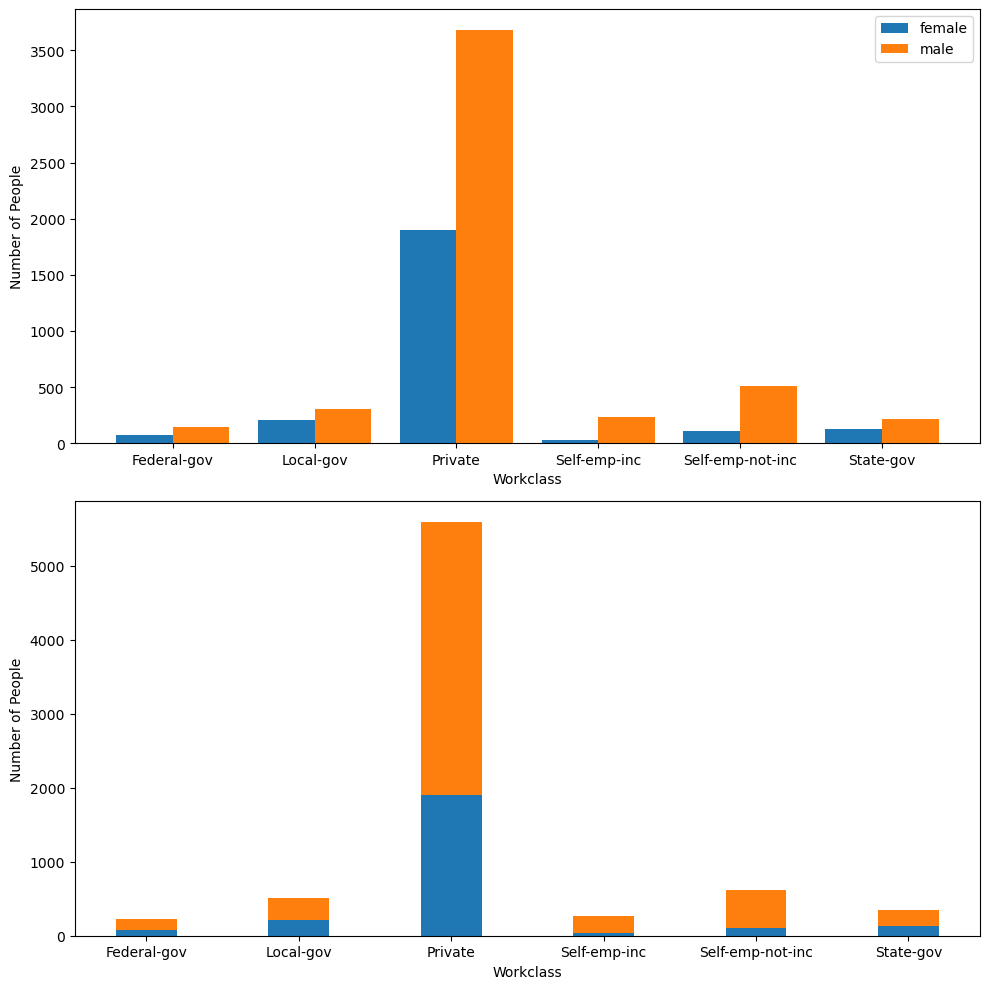

In [6]:
x = np.arange(len(table.columns))
width = 0.4

fig, axes = plt.subplots(2, figsize = (10, 10))
axes[0].bar(x - width/2, table.iloc[0], width, label = "female")
axes[0].bar(x + width/2, table.iloc[1], width, label = "male")

axes[0].legend()
axes[0].set_xticks(x, table.columns)
axes[0].set_ylabel("Number of People")
axes[0].set_xlabel("Workclass")


axes[1].bar(table.columns, table.iloc[0], width, label = "female")
axes[1].bar(table.columns, table.iloc[1], width, bottom = table.iloc[0], label = "male")
axes[1].set_ylabel("Number of People")
axes[1].set_xlabel("Workclass")
fig.tight_layout()


Figure 8. Grouped bar chart showing the number of people in each workclass based on their gender.
Figure 9. Stacked bar chart showing the number of people in each workclass based on their gender.

### Question4. Generate a table of gender (rows) and workclass (columns), normalized by the row-marginal counts of males and females , such that you have *conditional probabilities of workclass, given the gender* . Print the table and make a stacked barplot of these conditional probabilities. (? / 3 points)

Hint: Please check the lecture carefully for the definition of a *conditional probability* and how to compute it. We are looking here for $p(workclass | gender)$.

In [7]:
table2 = pd.crosstab(df['gender'], df['workclass'], margins = False, normalize = "index")
table2

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
gender,,,,,,
Female,0.030894,0.084959,0.773577,0.013415,0.043902,0.053252
Male,0.028498,0.059945,0.724057,0.045794,0.099843,0.041863


Text(0, 0.5, 'Frequency')

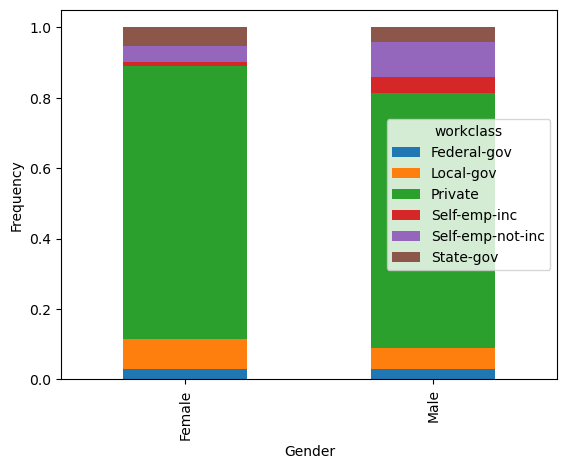

In [8]:
g = table2.plot(kind = "bar", stacked = True)
g.set_xlabel("Gender")
g.set_ylabel("Frequency")

Figure 10. Stacked bar plot of workclass given gender. Workclasses are colour coded with realitive proportions being represented in different colours. 

### Question5. Generate a table of workclass (rows) and gender (columns), with the *conditional probabilities of the gender, given the workclass*.  Print the table and show the conditional probabilities as a stacked barplot for each workclass. Written answer: What is the height of the stacked bar (males + females) for each workclass and why? (? / 3 points)
Hint: Again - check the definition of conditional probability to determine whether you need to normalize the counts by the sum of the rows (index) or columns. 

Text(0, 0.5, 'Frequency')

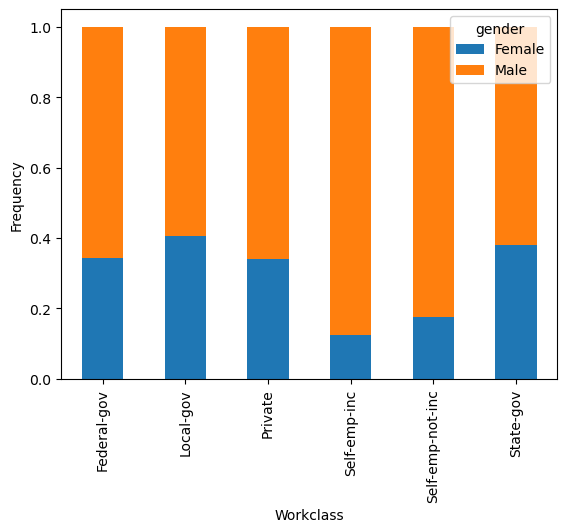

In [9]:
table3 = pd.crosstab(df['workclass'], df['gender'], margins = False, normalize = "index")
table3
g = table3.plot(kind = "bar", stacked = True)
g.set_xlabel("Workclass")
g.set_ylabel("Frequency")

Figure 11. Stacked bar plot showing the gender frequency within each workclass

##### Written Answer
The height of each workclass is equal to 1 as it is looking at the total number of people that do that job and 
dividing based on the percentage split between men and women. Simply, it is showing the proportion of women and men per work class. In Q4, it is similar as the height is also 1, but it is looking men and women seperately and their relative proportions for each workclass amoungst the same gender. 

### Question6. Written response: Compare the 2 plots from questions 4 and 5. For each plot, describe which aspect of the data can be most readily seen (? / 4 points)

In Q4 the information most readily seen is how each gender splits between each workclass with a large focus on those within the same gender, and how they are spread between each work class sector. With Q5 what is most readily seen is how each work class is divided per gender, with an emphasis on each jobs male to female ration rather than how the overall population is split between each job. 

## Task 3: Probabilities (? / 20 points)

For each of the questions in this task, you  should show the formula you used to compute the probability. <br>
For each of the tasks in this section, print the answer in a full sentence. For instance, your output should not just be a value but instead: <br>
__Probability of being employed in a private company given that the gender is male, is 0.xxx__ <br>
Using the contingency tables, compute and print.

### Question1. The marginal probability of a person in the sample being employed by the federal government (? / 2 points)

In [10]:
table = pd.crosstab(df['gender'], df['workclass'], margins = True) # Same table as task 2 Q1 but with margins
table

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,All
gender,,,,,,,
Female,76,209,1903,33,108,131,2460
Male,145,305,3684,233,508,213,5088
All,221,514,5587,266,616,344,7548


In [11]:
mpFG = table.iloc[2]["Federal-gov"] / table.iloc[2]["All"]
mpFG # marginal probability federal government

print(f"Probability of being employed by the Federal Government, is {mpFG:.3f}")

Probability of being employed by the Federal Government, is 0.029


### Question2. the marginal probability being employed by a private company (? / 2 points)

In [12]:
mpPC = table.iloc[2]["Private"]/table.iloc[2]["All"]
mpPC # marginal probability private tf

print(f"Probability of being employed by a private company, is {mpPC:.3f}")

Probability of being employed by a private company, is 0.740


### Question3. the marginal probability in the sample of being female (? / 2 points)

In [13]:
mpF = table.iloc[0]["All"]/table.iloc[2]["All"]
mpF # marginal peobability female

print(f"Probability of being female, is {mpF:.3f}")

Probability of being female, is 0.326


### Question4. the conditional probability of being employed in Local Government given that the gender is female (? / 2 points)

In [14]:
# Conditional Probability P(A given B) = P(A and B) / P(B)

cpLGaF = (table.iloc[0]["Local-gov"]/table.iloc[2]["All"]) / (table.iloc[0]["All"]/table.iloc[2]["All"])
cpLGaF # conditional probability local government and female

print(f"Probability of being employed by a in a local government given female, is {cpLGaF:.3f}")

Probability of being employed by a in a local government given female, is 0.085


### Question5. the conditional probability of being employed in Local Government given that the gender is male (? / 2 points)

In [15]:
cpLGaM = (table.iloc[1]["Local-gov"]/table.iloc[2]["All"]) / (table.iloc[1]["All"]/table.iloc[2]["All"])
## Personal notes 
# employed in local gov = males in local gov / Total participants
# given gender is male = all males / total participants

cpLGaM # conditional probability local government and male
print(f"Probability of being employed by a in a local government given male, is {cpLGaM:.3f}")

Probability of being employed by a in a local government given male, is 0.060


### Question6. the conditional probability of the gender being female given that the person is employed in Local government (? / 2 points)

In [16]:
cpFaLG = (table.iloc[0]["Local-gov"]/table.iloc[2]["All"]) / (table.iloc[2]["Local-gov"]/table.iloc[2]["All"])
## Personal notes 
# Being female = females in local gov / total participants
# local government = all local gov / total participants


cpFaLG  # conditional probability female and local government
print(f"Probability of being female given employed by a in a local government, is {cpFaLG:.3f}")

Probability of being female given employed by a in a local government, is 0.407


### Question7.  the conditional probability of the gender being male given that the person is employed in Local government  (? / 2 points)

In [17]:
cpMaLG = (table.iloc[1]["Local-gov"]/table.iloc[2]["All"]) / (table.iloc[2]["Local-gov"]/table.iloc[2]["All"])
cpMaLG  # conditional probability male and local government 

print(f"Probability of being male given employed by a in a local government, is {cpMaLG:.3f}")

Probability of being male given employed by a in a local government, is 0.593


### Question8. How does the probability of  female change from when you don’t know the workclass to when you know that the person works in local government?  (? / 2 points)

The probabilities being looked are the probability of being female at 0.326 and the probability of being female and working in local government at 0.407, therefore the probablity increases when you know the workclass is local government. This makes sense as if you look at figure 11 you can see that local government contains the largest ratio of females, when looking at the gender/workclass split. The marginal probability of being female is lower as more males were looked at in the study, so knowing taht the workclass is the one that contains the most females would increase the probility. 

### Question9. What is the joint probability of a person being female AND employed in Local government? (? / 2 points)

In [18]:
jpFaLG = mpF * cpLGaF
jpFaLG # Join Probability Female and Local Government

## Variable refresher 
# mpF = table.iloc[0]["All"] / table.iloc[2]["All"]
# cpLGaF = (table.iloc[0]["Local-gov"] / table.iloc[2]["All"]) / (table.iloc[0]["All"]/table.iloc[2]["All"])

print(f"Probability of being female and employed by a in a local government, is {jpFaLG:.3f}")

Probability of being female and employed by a in a local government, is 0.028


### Question10. What is the expected probability of being in local government AND being female IF gender and workclass were independent? (? / 2 points)

In [19]:
epLGaFiI = mpF * table.iloc[2]["Local-gov"]/table.iloc[2]["All"]
epLGaFiI # Expected Probability Local Government and Female if Independent

## Variable refresher 
# mpF = table.iloc[0]["All"] / table.iloc[2]["All"]

print(f'''Probability of being female and employed by a in a local government if workclass is independent, 
is {epLGaFiI:.3f}''')

Probability of being female and employed by a in a local government if workclass is independent, 
is 0.022


## Task 4: Descriptive Statistics by Category (pg 24-30 and pg 250-256) (? / 20 points)

### Question1. Using pandas statistics functions (pg. 137-141) and the groupby method determine the mean income by gender. (? / 5 points)

In [20]:
meanIncomeGender = df["income"].groupby(df["gender"]).mean()
meanIncomeGender

gender
Female    29958.721035
Male      39205.211701
Name: income, dtype: float64

### Question2. Determine and print the mean income by workclass. For this question use a for loop to iterate over the different workclasses that exist. This needs to be done in three steps (? / 15 points)

You need to use a for loop here- do not simply write down individual print statements 

#### a. Use the groupby function to calculate the mean by workclass (? / 3 points)

In [21]:
IncomeWorkclass2 = df.groupby(df["workclass"])
IncomeWorkclass2

# Not sure how this was meant to be done. 
# Adding the mean did not allow it to be a dataframe and then I couldn't get the group keys
# I did the mean calculation within the for loop where I can index it accordingly

#### b. Create a variable that stores the names of each workclass  (? / 3 points)
Hint:  use .groups.keys() on the  groupby object returned in a. 

In [22]:
dictkeys = IncomeWorkclass2.groups.keys()
dictkeys

dict_keys(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov'])

#### c. Iterate over this variable using a for loop and print the means for each category using a full sentence of the form "The mean income for an xxxx  is yyyy. (? / 9 points)

In [23]:
# 2 DP used as talking about money 
i = 0
for x in dictkeys: 
    print(f"The mean income for {x}, is ${df['income'].groupby(df['workclass']).mean().iloc[i]:.2f}")
    i += 1

The mean income for Federal-gov, is $45349.36
The mean income for Local-gov, is $38897.75
The mean income for Private, is $34924.67
The mean income for Self-emp-inc, is $49726.17
The mean income for Self-emp-not-inc, is $39795.90
The mean income for State-gov, is $38128.58


## Task 5: Histogram visualization by group (? / 25 points)
In this task you will learn how to use __seaborn__. Seaborn is a library built on top of matplotlib and it's closely integrated with pandas data structures.  

### Question1.Using _groupby_ create two series, one that has the income for males, and one for females.  Use _groupby_ to first group the income values by gender and then use _get_group(genderValue)_ to create a new series for the specified gender (? / 4 points)

In [24]:
incomeMales = df['income'].groupby(df['gender']).get_group("Male")
meanIncomeMales = incomeMales.mean()

incomeFemale = df['income'].groupby(df['gender']).get_group("Female")
meanIncomeFemales = incomeFemale.mean()

print(f"The mean income for males in {meanIncomeMales:.2f}, and the mean income for females is {meanIncomeFemales:.2f}")


The mean income for males in 39205.21, and the mean income for females is 29958.72


### Question2. Visualize on the same plot the distribution of incomes using the histogram – plot the two histograms on top of each other for direct comparison. (? /5 points)

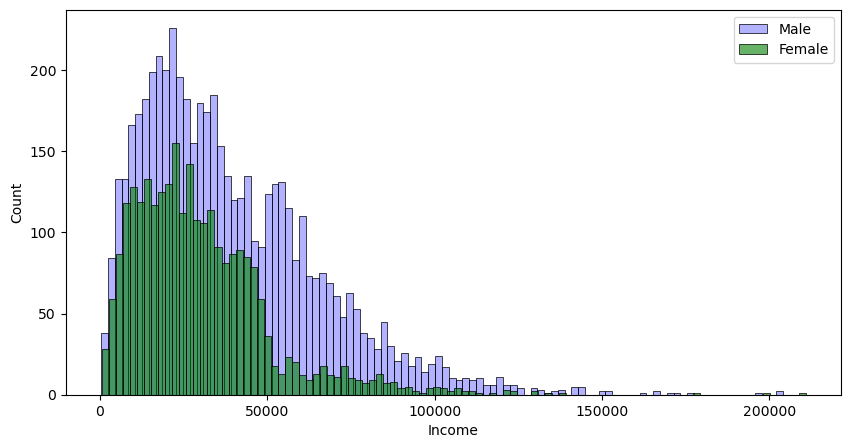

In [25]:
fig, axes = plt.subplots(figsize = (10,5))
sns.histplot(data = df, x = incomeMales, ax = axes, color = "b", bins = 100, alpha = 0.3)
sns.histplot(data = df, x = incomeFemale, ax = axes, color = "g", bins = 100, alpha = 0.6)
axes.set_xlabel("Income")
plt.legend (loc = 'upper right', labels = ["Male", "Female"])

Figure 12. Histogram of distribution of income by gender. 


### Question3. Plot the same data, using a boxplot, splitting by gender (? / 4 points)

Text(0.5, 0, 'Gender')

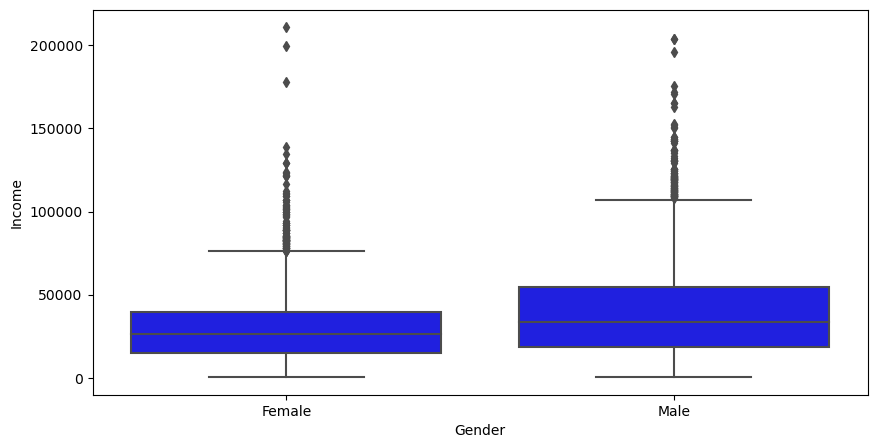

In [26]:
fig, axes = plt.subplots(figsize = (10,5))
sns.boxplot(data = df, y = "income", x = "gender", ax = axes, color = "b")
axes.set_ylabel("Income")
axes.set_xlabel("Gender")

Figure 13. Boxplot of distribution of income by gender. 

### Question4. Plot the same data using a violin plot, splitting by gender. (? / 4 points)

Text(0.5, 0, 'Gender')

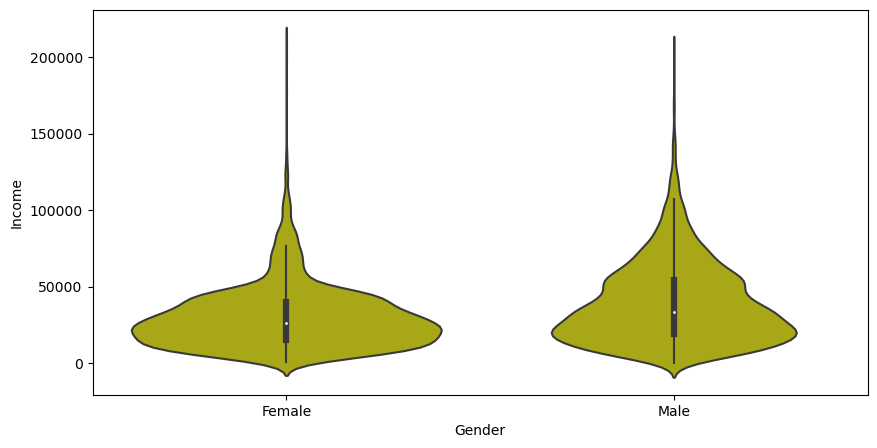

In [27]:
fig, axes = plt.subplots(figsize = (10,5))
sns.violinplot(data = df, y = "income", x = "gender", ax = axes, color = "y")
axes.set_ylabel("Income")
axes.set_xlabel("Gender")

Figure 14. Violin plot of distribution of income by gender. 

### Question5. Make a boxplot of income split by workclass. (? /4 points)

Text(0.5, 0, 'Workclass')

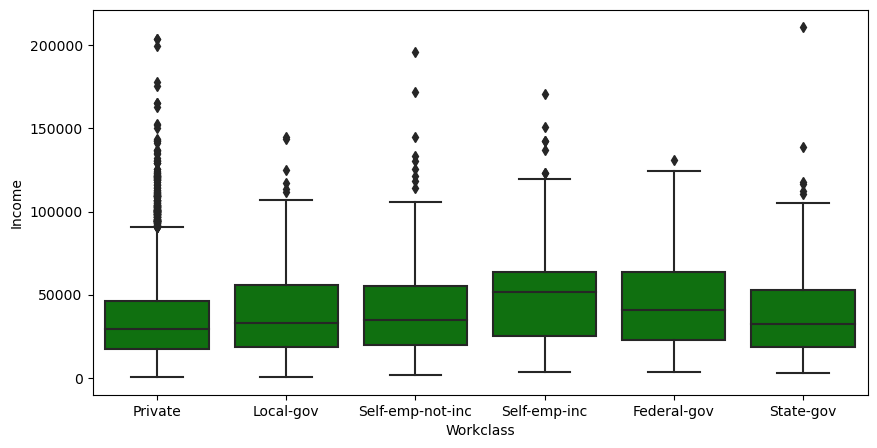

In [28]:
fig, axes = plt.subplots(figsize = (10,5))
sns.boxplot(data = df, y = "income", x = "workclass", ax = axes, color = "g")
axes.set_ylabel("Income")
axes.set_xlabel("Workclass")

Figure 15. Boxplot of income by workclass. 

### Question6. Make a violin plot of income - with workclass on the x-axis, and then split by gender. In which workclass does the gender pay gap look smallest? (? / 4 points).
Hint: doing plots where the data is split by multiple categories is easy in seaborn - using hue as additional input argument. 


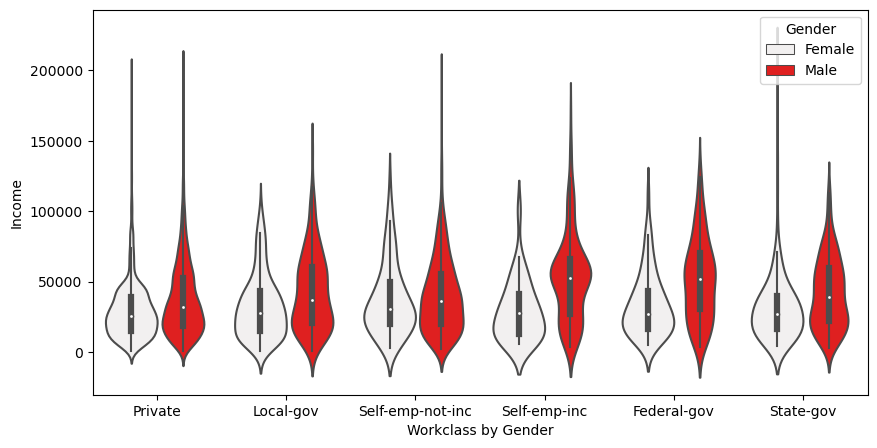

In [29]:
fig, axes = plt.subplots(figsize = (10,5))
sns.violinplot(data = df, y = "income", x = "workclass", hue = "gender", ax = axes, color = "r")
axes.set_ylabel("Income")
axes.set_xlabel("Workclass by Gender")
plt.legend (title = "Gender")

Figure 16. Violin plot of income by gender, further split by each workclass 